In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [5]:
# dados da base de matemática
port_data = pd.read_csv("students/student-por.csv", delimiter=';')
port_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [6]:
port_data.shape

(649, 33)

In [7]:
# tipos das colunas
port_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
# verificando total de dados duplicados
port_data.duplicated().sum()

0

In [9]:
# verficando colunas com valores NaN
port_data.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

# **Pré-processamento dos dados**

Foi convertido os valores de variáveis categóricas para valores numéricos.

Acabei fazendo de forma mais manual para ter um controle melhor, como o dataset
para os exercícios é mais controlado eu optei por fazer desta forma.

Para a maioria das variáveis apenas converti o valor categórico para 0 ou 1.

Para outros casos foram criados mais valores.

In [10]:
# convertendo variáveis categóricas para numéricas

# [GP = 0, MS = 1]
port_data['school'].replace(['GP','MS'], [0,1], inplace=True)

# [F = 0, M = 1]
port_data['sex'].replace(['F','M'], [0,1], inplace=True)

# [U = 0, R = 1]
port_data['address'].replace(['U','R'], [0,1], inplace=True)

# [LE3 = 0, GT3 = 1]
port_data['famsize'].replace(['LE3','GT3'], [0,1], inplace=True)

# [T = 0, A = 1]
port_data['Pstatus'].replace(['T','A'], [0,1], inplace=True)

# [teacher = 0, health = 1, services = 2, at_home = 3, other = 4]
port_data['Mjob'].replace(['teacher','health','services','at_home','other'], [0,1,2,3,4], inplace=True)
port_data['Fjob'].replace(['teacher','health','services','at_home','other'], [0,1,2,3,4], inplace=True)

# [mother = 0, father = 1, other = 2]
port_data['guardian'].replace(['mother','father','other'], [0,1,2], inplace=True)

# [no = 0, yes = 1]
port_data['schoolsup'].replace(['no','yes'], [0,1], inplace=True)

# [no = 0, yes = 1]
port_data['famsup'].replace(['no','yes'], [0,1], inplace=True)

# [no = 0, yes = 1]
port_data['paid'].replace(['no','yes'], [0,1], inplace=True)

# [no = 0, yes = 1]
port_data['activities'].replace(['no','yes'], [0,1], inplace=True)

# [no = 0, yes = 1]
port_data['nursery'].replace(['no','yes'], [0,1], inplace=True)

# [no = 0, yes = 1]
port_data['higher'].replace(['no','yes'], [0,1], inplace=True)

# [no = 0, yes = 1]
port_data['internet'].replace(['no','yes'], [0,1], inplace=True)

# [no = 0, yes = 1]
port_data['romantic'].replace(['no','yes'], [0,1], inplace=True)

port_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,1,0,2,3,2,4,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,0,0,0,3,1,0,2,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,0,1,0,1,1,4,4,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,0,0,0,3,1,2,2,...,2,4,5,3,4,2,6,10,10,10


In [11]:
# tirando algumas colunas que para mim não são necessárias
df = port_data
df = df.drop(['Mjob', 'Fjob', 'reason', 'romantic'], axis=1)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,1,4,4,0,2,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,0,1,0,1,1,1,1,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,0,0,0,1,1,0,1,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,0,1,0,4,2,0,1,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,0,1,0,3,3,1,1,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,1,0,2,3,0,1,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,0,0,0,3,1,0,1,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,0,1,0,1,1,0,2,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,0,0,0,3,1,0,2,...,2,4,5,3,4,2,6,10,10,10


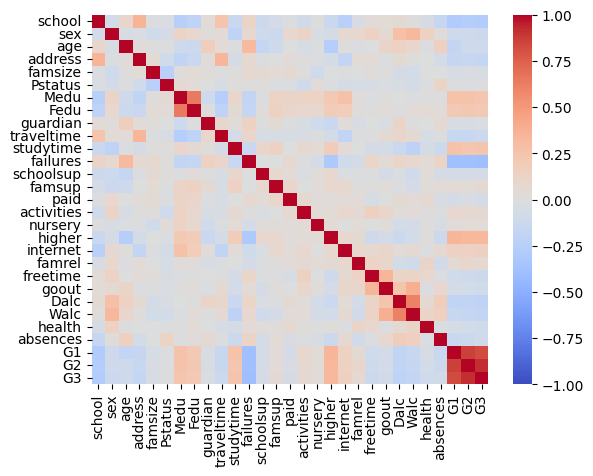

In [12]:
# Gerando um heatmap para enteder quais variáveis estão mais correlacionadas
sns.heatmap(df.corr(), xticklabels=True, yticklabels=True, annot=False, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [13]:
# y -> target (variavel dependete)
# x -> variaveis independentes
y = df[["G3"]]
x = df[["Medu", "Fedu", "studytime", "higher", "internet", "schoolsup", "famsup", "freetime", "goout", "Dalc", "Walc", "G1", "G2"]]

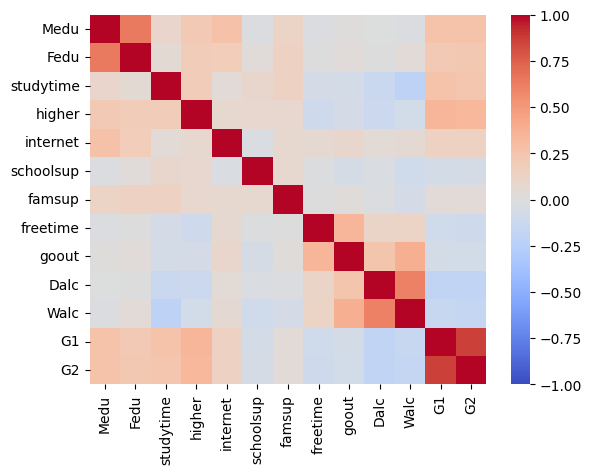

In [14]:
# Gerando um novo heatmap apenas com as variáveis selecionadas para o treinamento
sns.heatmap(x.corr(), xticklabels=True, yticklabels=True, annot=False, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [15]:
# fazendo split do dataset
x_train, x_test, y_train, y_test = train_test_split(x, y)

# **Diferentes modelos**

1.   Regressão linear
2.   Árvores de decisão
3.   SVM
4.   Regressão probabilistica



In [16]:
# criando um modelo de regressão linear
reg = LinearRegression()
reg.fit(x_train, y_train)

reg.score(x_train, y_train)

# predicoes
y_pred = reg.predict(x_test)

# passando o vetor das predições para um dataframe
grade_predictions = pd.DataFrame(y_pred, columns=['Predição das notas'])


# inserindo uma nova coluna para conceito
grade_predictions.insert(1, "Conceito Final", True)

cols = grade_predictions.columns.tolist()

grade_predictions['Conceito Final'] = grade_predictions['Predição das notas'].where(grade_predictions['Predição das notas'] >= 12, other=False)
grade_predictions['Conceito Final'] = grade_predictions['Conceito Final'].where(grade_predictions['Conceito Final'] == False, other=True)
grade_predictions

#grade_predictions.to_csv('out.csv', index=False)

,Predição das notas,Conceito Final
0,13.366710,True
1,15.360078,True
2,11.751491,False
3,18.334851,True
4,10.365597,False
...,...,...
158,16.623845,True
159,0.904491,False
160,15.443170,True
161,12.358861,True


In [36]:
# criando um modelo de árvores de decisão
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# acurácia
acc = accuracy_score(y_test, y_pred)

# precisão
precision = precision_score(y_test, y_pred, average=None, zero_division=1)

# recall
recall = recall_score(y_test, y_pred, average=None, zero_division=1)

# acurácia balanceada
ba = balanced_accuracy_score(y_test, y_pred)

# kappa
kappa = cohen_kappa_score(y_test, y_pred)

print(clf.score(x_train, y_train))

print(classification_report(y_test, y_pred, zero_division=1))

grade_predictions = pd.DataFrame(y_pred, columns=['Predição das notas'])

# inserindo uma nova coluna para conceito
grade_predictions.insert(1, "Conceito Final", True)

cols = grade_predictions.columns.tolist()

grade_predictions['Conceito Final'] = grade_predictions['Predição das notas'].where(grade_predictions['Predição das notas'] >= 12, other=0)
grade_predictions['Conceito Final'] = grade_predictions['Conceito Final'].where(grade_predictions['Conceito Final'] == False, other=1)
grade_predictions

1.0
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       1.00      0.00      0.00         1
           5       0.00      1.00      0.00         0
           6       1.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.45      0.45      0.45        11
           9       0.17      0.29      0.21         7
          10       0.40      0.36      0.38        22
          11       0.50      0.44      0.47        27
          12       0.36      0.50      0.42        18
          13       0.56      0.43      0.49        21
          14       0.24      0.29      0.26        14
          15       0.38      0.23      0.29        13
          16       0.56      0.83      0.67         6
          17       0.57      0.40      0.47        10
          18       0.67      1.00      0.80         4

    accuracy                           0.41       163
   macro avg       0.4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


,Predição das notas,Conceito Final
0,14,1
1,15,1
2,13,1
3,18,1
4,10,0
...,...,...
158,16,1
159,0,0
160,15,1
161,14,1


In [22]:
# criando um modelo de svm
clf = svm.SVC()
clf.fit(x_train, y_train.values.ravel())


y_pred = clf.predict(x_test)

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# acurácia
acc = accuracy_score(y_test, y_pred)

# precisão
precision = precision_score(y_test, y_pred, average=None, zero_division=1)

# recall
recall = recall_score(y_test, y_pred, average=None, zero_division=1)

# f1 score
f1 = f1_score(y_test, y_pred, average=None)

# acurácia balanceada
ba = balanced_accuracy_score(y_test, y_pred)

# kappa
kappa = cohen_kappa_score(y_test, y_pred)

print(clf.score(x_train, y_train))

print(classification_report(y_test, y_pred, zero_division=1))

grade_predictions = pd.DataFrame(y_pred, columns=['Predição das notas'])

# inserindo uma nova coluna para conceito
grade_predictions.insert(1, "Conceito Final", True)

cols = grade_predictions.columns.tolist()

grade_predictions['Conceito Final'] = grade_predictions['Predição das notas'].where(grade_predictions['Predição das notas'] >= 12, other=0)
grade_predictions['Conceito Final'] = grade_predictions['Conceito Final'].where(grade_predictions['Conceito Final'] == False, other=1)
grade_predictions

0.41358024691358025
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         2
           7       1.00      0.00      0.00         3
           8       0.50      0.36      0.42        11
           9       1.00      0.00      0.00         7
          10       0.36      0.64      0.46        22
          11       0.45      0.63      0.52        27
          12       0.50      0.11      0.18        18
          13       0.38      0.90      0.54        21
          14       0.00      0.00      0.00        14
          15       0.12      0.15      0.14        13
          16       0.00      0.00      0.00         6
          17       1.00      0.00      0.00        10
          18       1.00      0.00      0.00         4

    accuracy                           0.36       163
   macro avg       0.62      0.20      0.18       163
weight

,Predição das notas,Conceito Final
0,13,1
1,15,1
2,11,0
3,16,1
4,11,0
...,...,...
158,15,1
159,0,0
160,15,1
161,12,1


In [26]:
# criando um modelo de regressão logistica
clf = LogisticRegression(solver='lbfgs', max_iter=5000)
clf.fit(x_train, y_train.values.ravel())

y_pred = clf.predict(x_test)

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# acurácia
acc = accuracy_score(y_test, y_pred)

# precisão
precision = precision_score(y_test, y_pred, average=None, zero_division=1)

# recall
recall = recall_score(y_test, y_pred, average=None, zero_division=1)

# f1 score
f1 = f1_score(y_test, y_pred, average=None)

# acurácia balanceada
ba = balanced_accuracy_score(y_test, y_pred)

# kappa
kappa = cohen_kappa_score(y_test, y_pred)

print(clf.score(x_train, y_train))

print(classification_report(y_test, y_pred, zero_division=1))

grade_predictions = pd.DataFrame(y_pred, columns=['Predição das notas'])

# inserindo uma nova coluna para conceito
grade_predictions.insert(1, "Conceito Final", True)

cols = grade_predictions.columns.tolist()

grade_predictions['Conceito Final'] = grade_predictions['Predição das notas'].where(grade_predictions['Predição das notas'] >= 12, other=0)
grade_predictions['Conceito Final'] = grade_predictions['Conceito Final'].where(grade_predictions['Conceito Final'] == False, other=1)
grade_predictions

0.5699588477366255
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      0.00      0.00         1
           6       1.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.43      0.55      0.48        11
           9       0.50      0.14      0.22         7
          10       0.38      0.45      0.42        22
          11       0.34      0.44      0.39        27
          12       0.25      0.17      0.20        18
          13       0.56      0.67      0.61        21
          14       0.19      0.21      0.20        14
          15       0.56      0.38      0.45        13
          16       0.50      0.50      0.50         6
          17       0.83      0.50      0.62        10
          18       0.57      1.00      0.73         4

    accuracy                           0.42       163
   macro avg       0.54      0.38      0.38       163
weighte

,Predição das notas,Conceito Final
0,13,1
1,15,1
2,12,1
3,18,1
4,10,0
...,...,...
158,16,1
159,0,0
160,15,1
161,12,1


# **Resultados**

**Árvores de decisão:**

Precisão: 67%

recall: 100%

f1-score: 80%

acurácia: 42%



**SVM:**

Precisão: 100%

recall: 0%

f1-score: 0%

acurácia: 36%



**Regrssão logistica:**

Precisão: 57%

recall: 100%

f1-score: 73%

acurácia: 42%


De maneira geral, as árvores de decisão tiveram um resultado melhor. A regressão
logistica teve um resultado semelhante. A SVM eu estranhei os resultados, talvez
eu possa ter confundido o valor das classes para a análise.